In [2]:
import pandas as pd

data = pd.read_csv('data/bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

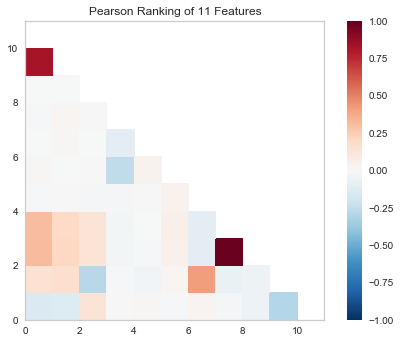

In [3]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

In [4]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='temp', target='feelslike')
visualizer.fit(X['temp'], X['feelslike'])
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))
/Users/adammorris/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


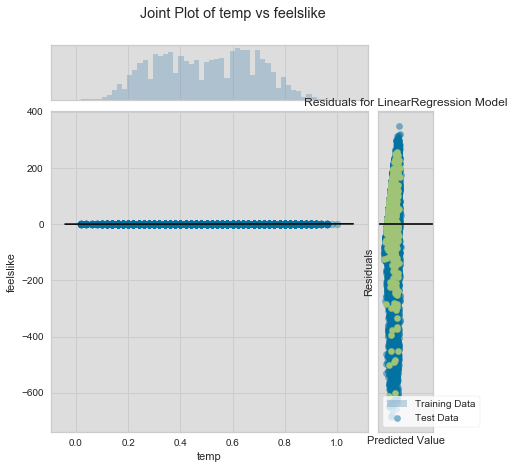

In [5]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=400
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

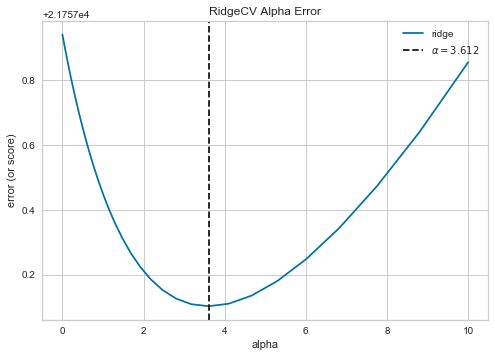

In [6]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

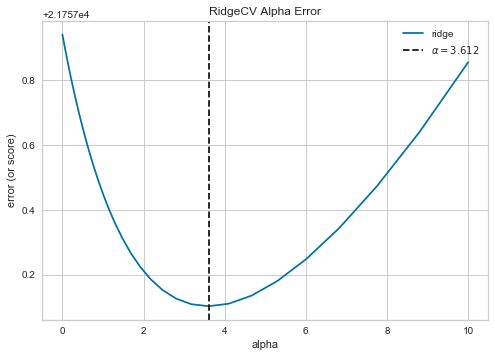

In [7]:
import numpy as np

from sklearn.linear_model import Lasso
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

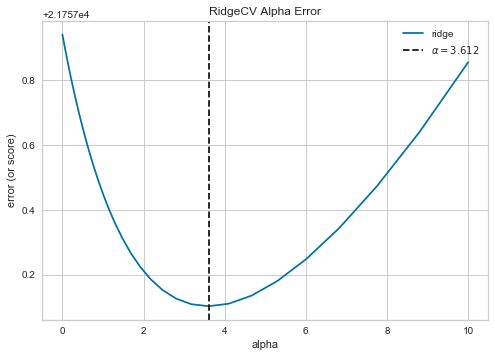

In [8]:
import numpy as np

from sklearn.linear_model import Ridge
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

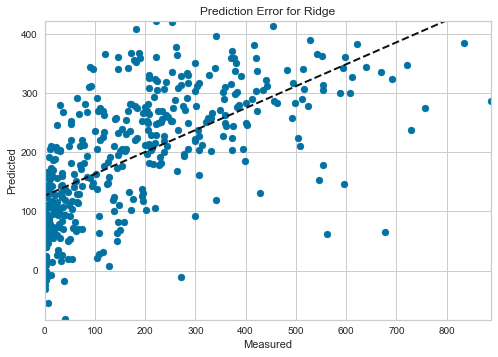

In [9]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.612))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [10]:
import os
import pandas as pd

names = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color'
]

dataset   = pd.read_csv('data/mushroom.csv')
dataset.columns = names
dataset.head()

,class,cap-shape,cap-surface,cap-color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [11]:
features = ['cap-shape', 'cap-surface', 'cap-color']
target   = ['class']

X = dataset[features]
y = dataset[target]

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

In [13]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [14]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [15]:
model_selection(X, y, LinearSVC())

0.6583804143126177

In [16]:
model_selection(X, y, NuSVC())

0.6726016476215785

In [17]:
model_selection(X, y, SVC())

0.6624286455630514

In [18]:
model_selection(X, y, SGDClassifier())

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6557251908396947

In [19]:
model_selection(X, y, KNeighborsClassifier())

0.6581185045215279

In [20]:
model_selection(X, y, LogisticRegressionCV())

0.6583804143126177

In [21]:
model_selection(X, y, LogisticRegression())

0.6580434509606933

In [22]:
model_selection(X, y, BaggingClassifier())

0.6867812204031931

In [23]:
model_selection(X, y, ExtraTreesClassifier())

0.6871364804544838

In [24]:
model_selection(X, y, RandomForestClassifier())

0.6873056644585642

In [25]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.poof()

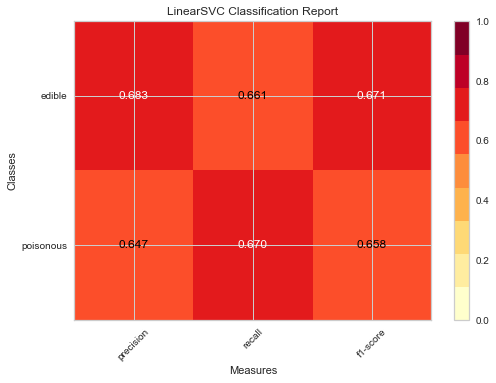

In [26]:
visual_model_selection(X, y, LinearSVC())

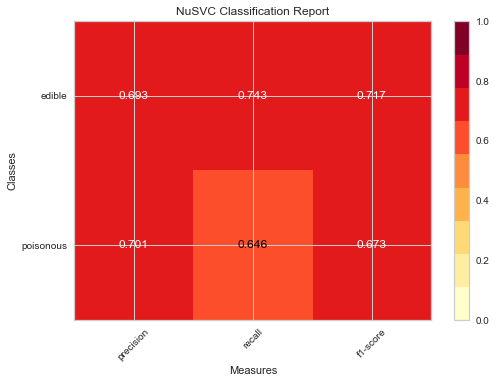

In [27]:
visual_model_selection(X, y, NuSVC())

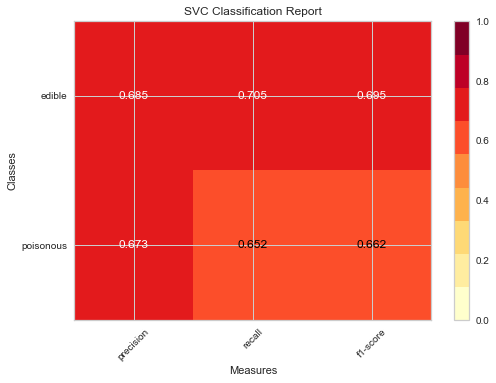

In [28]:
visual_model_selection(X, y, SVC())

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


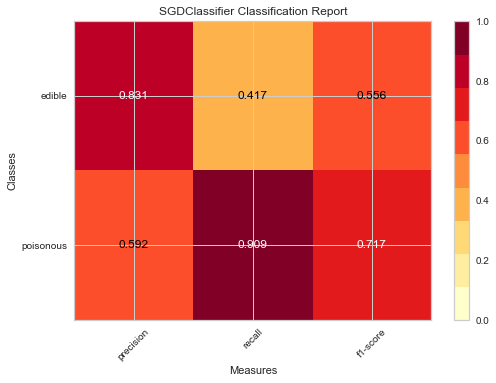

In [29]:
visual_model_selection(X, y, SGDClassifier())

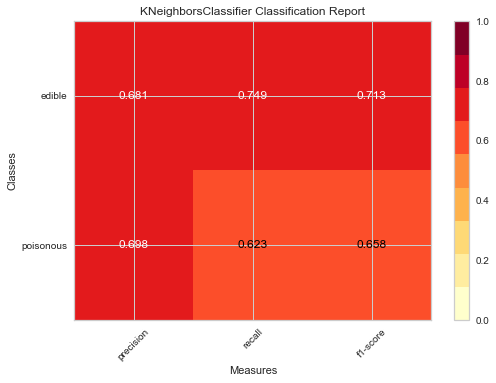

In [30]:
visual_model_selection(X, y, KNeighborsClassifier())

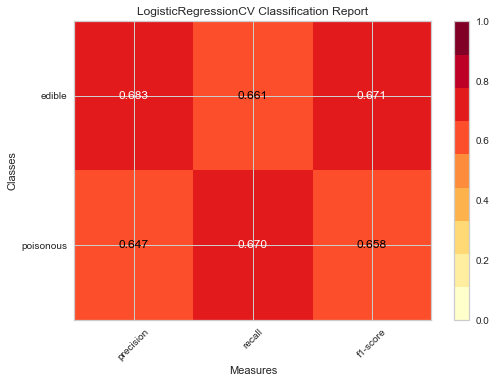

In [31]:
visual_model_selection(X, y, LogisticRegressionCV())

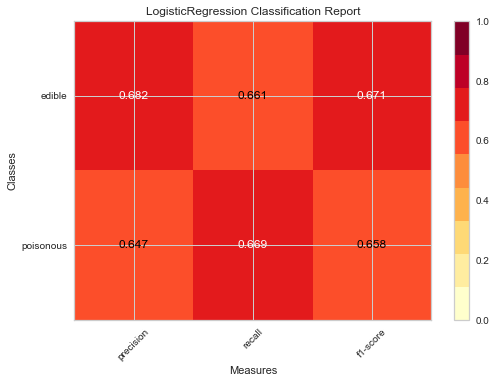

In [32]:
visual_model_selection(X, y, LogisticRegression())

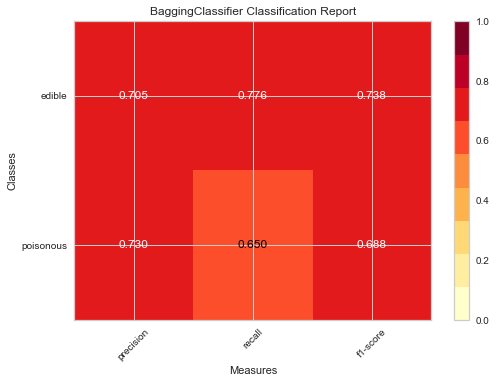

In [33]:
visual_model_selection(X, y, BaggingClassifier())

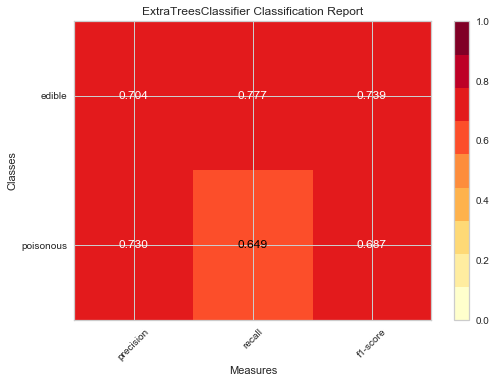

In [34]:
visual_model_selection(X, y, ExtraTreesClassifier())

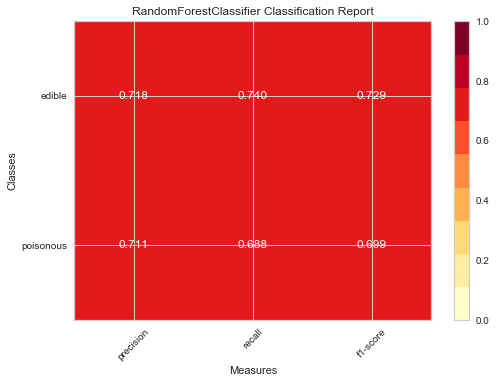

In [35]:
visual_model_selection(X, y, RandomForestClassifier())

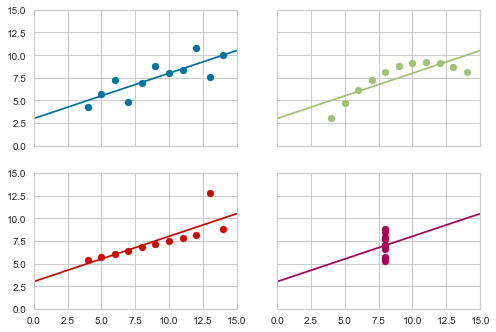

In [36]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

In [37]:
from yellowbrick.features.rankd import *
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

In [38]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

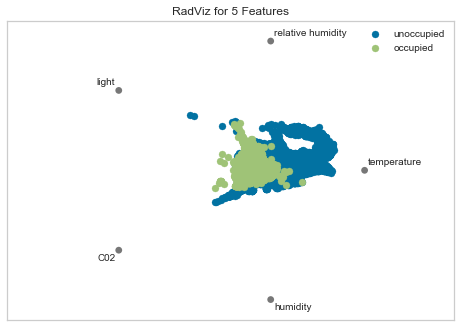

In [39]:
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [40]:
# Load the data set
data = pd.read_csv('data/credit.csv')

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

In [42]:
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

NameError: name 'Rank1D' is not defined

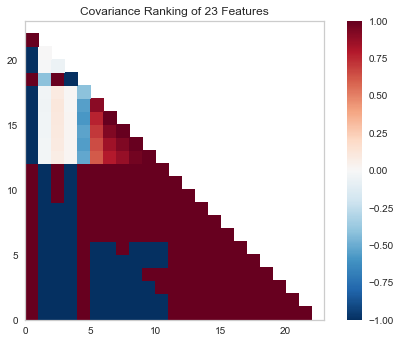

In [43]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

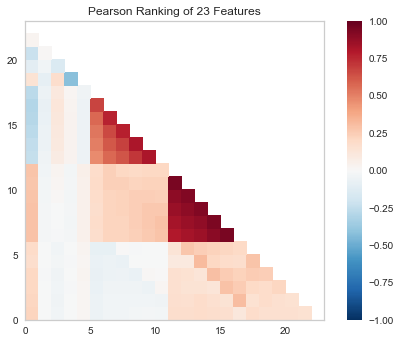

In [44]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [47]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

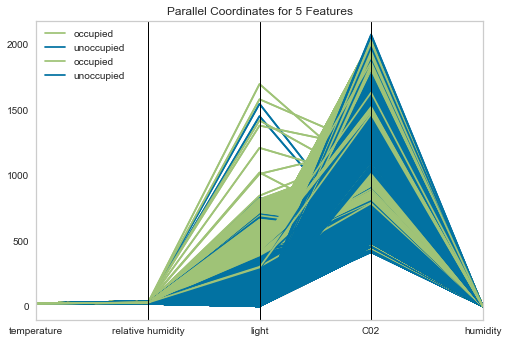

In [48]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features, normalize='standard', sample = 0.1)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [49]:
# Load the classification data set
data = pd.read_csv('data/credit.csv')

# Specify the features of interest
features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


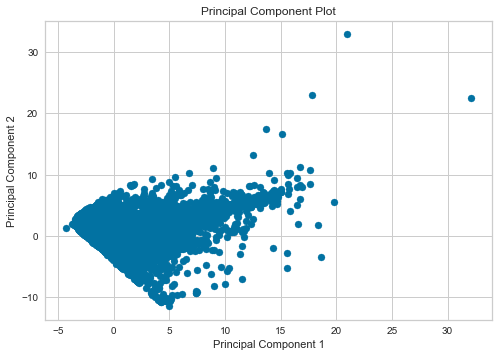

In [50]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


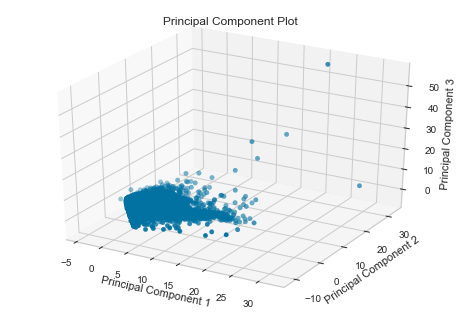

In [51]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [52]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features]
y = data.occupancy

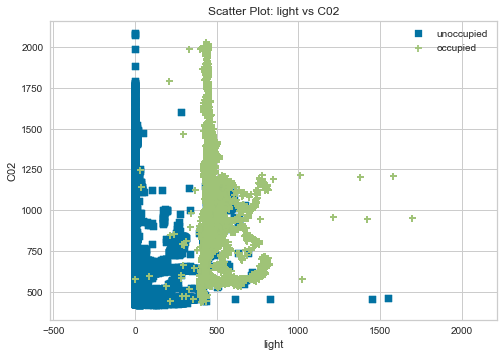

In [53]:
from yellowbrick.features import ScatterVisualizer

visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [54]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

In [55]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


In [56]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


In [57]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features]
y = data.occupancy

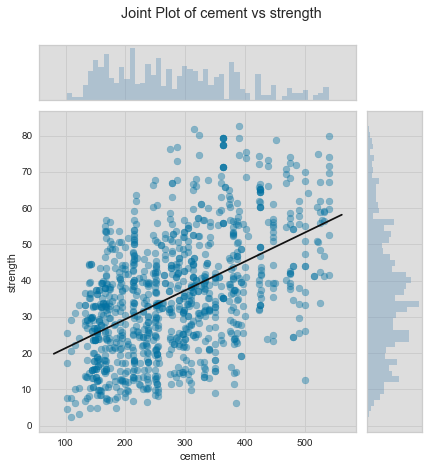

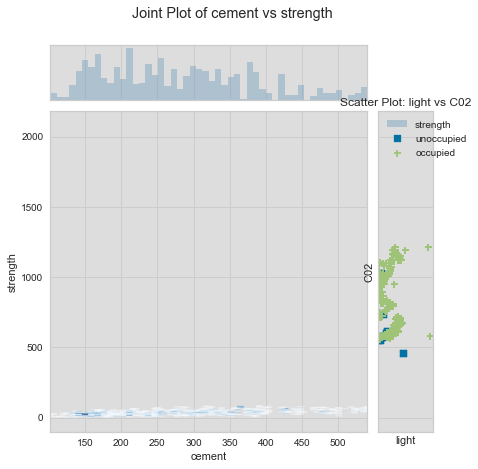

In [58]:
from yellowbrick.features import ScatterVisualizer

visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [59]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

In [60]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


In [61]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

/Users/adammorris/anaconda/lib/python3.5/site-packages/yellowbrick/features/jointplot.py:139: UserWarning: JointPlotVisualizer requires Matplotlib version 2.0.0.Please upgrade to continue.
  ).format(self.__class__.__name__))


In [62]:
# Regression Evaluation Imports

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

In [63]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

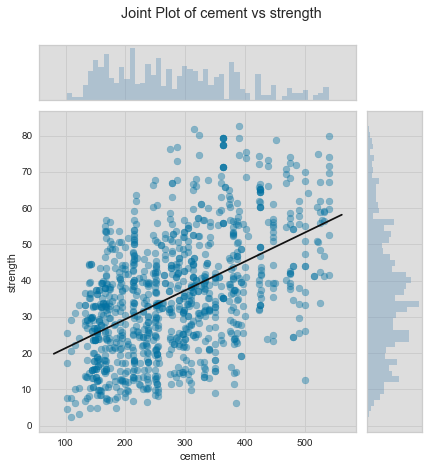

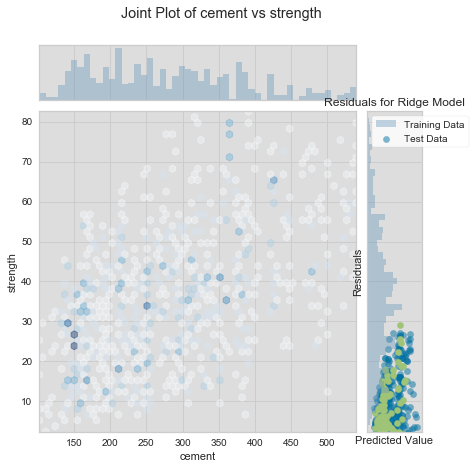

In [64]:
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [65]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

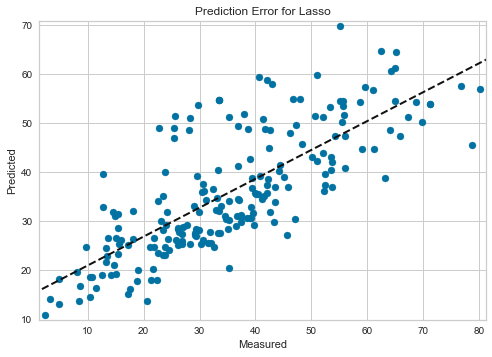

In [66]:
# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [67]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

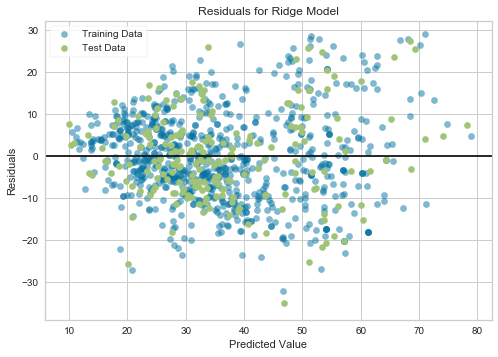

In [68]:
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [71]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

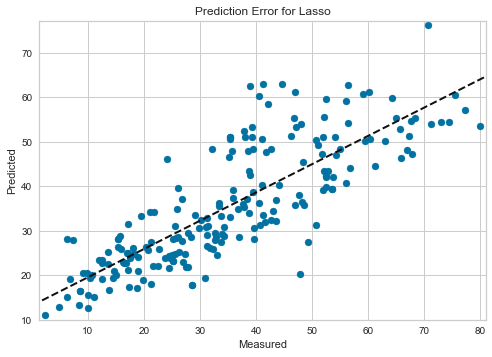

In [74]:
# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [77]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/adammorris/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


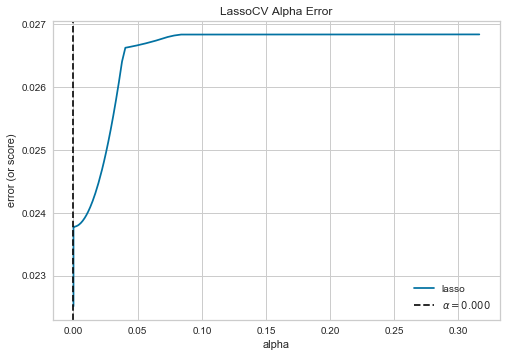

In [101]:
from sklearn.linear_model import LassoCV
# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

In [81]:
sklearn.linear_model.LassoCV

NameError: name 'sklearn' is not defined

In [85]:
from sklearn import linear_model

In [88]:
import sklearn

# #Classification Report

In [91]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

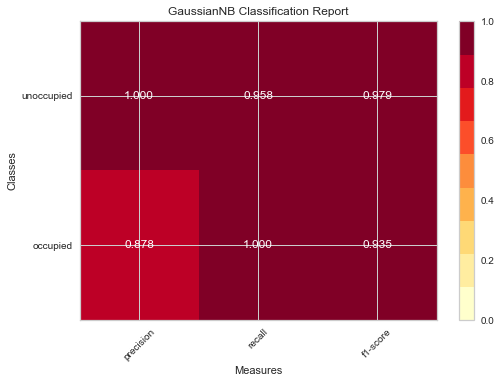

In [99]:
# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

Example

In [107]:
#First do our imports
import yellowbrick

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

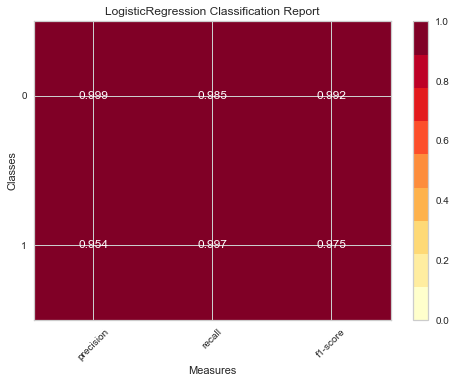

In [104]:
#Example
>>> from yellowbrick.classifier import ClassificationReport
>>> from sklearn.linear_model import LogisticRegression
>>> viz = ClassificationReport(LogisticRegression())
>>> viz.fit(X_train, y_train)
>>> viz.score(X_test, y_test)
>>> viz.poof()

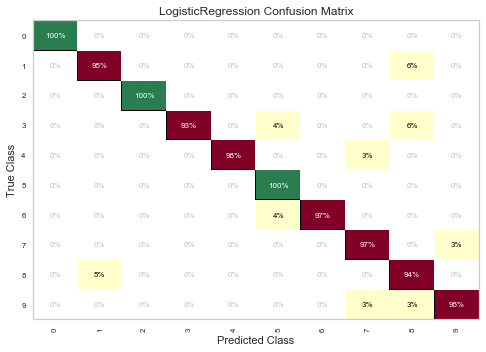

In [108]:
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)

model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

# Example

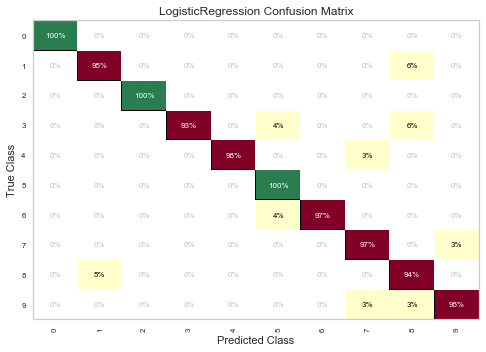

In [109]:
>>> from yellowbrick.classifier import ConfusionMatrix
>>> from sklearn.linear_model import LogisticRegression
>>> viz = ConfusionMatrix(LogisticRegression())
>>> viz.fit(X_train, y_train)
>>> viz.score(X_test, y_test)
>>> viz.poof()

In [111]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

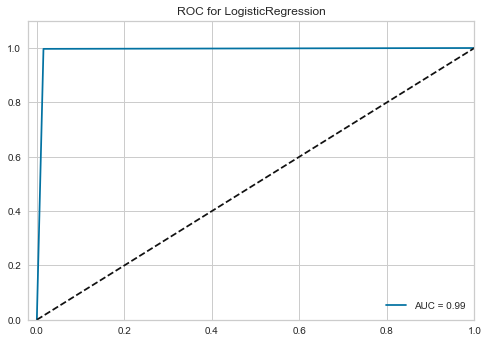

In [113]:
>>> from yellowbrick.classifier import ROCAUC
# Instantiate the classification model and visualizer
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

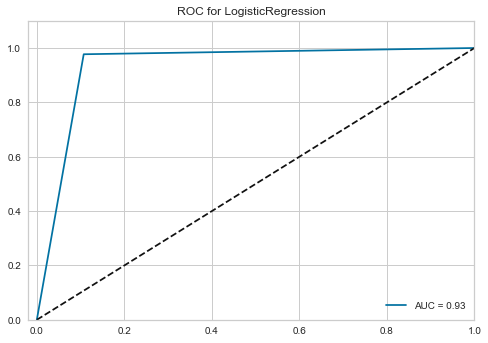

In [114]:
>>> from sklearn.datasets import load_breast_cancer
>>> from yellowbrick.classifier import ROCAUC
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.model_selection import train_test_split
>>> data = load_breast_cancer()
>>> X = data['data']
>>> y = data['target']
>>> X_train, X_test, y_train, y_test = train_test_split(X, y)
>>> viz = ROCAUC(LogisticRegression())
>>> viz.fit(X_train, y_train)
>>> viz.score(X_test, y_test)
>>> viz.poof()

Class Balance 

In [116]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

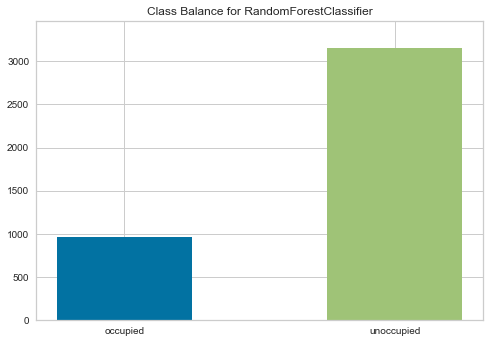

In [118]:
# Instantiate the classification model and visualizer
>>> from yellowbrick.classifier import ClassBalance
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data